# ASSOCIATION RULE LEARNING

**It is a rule-based machine learning technique used to find patterns (patterns, relationships, structures) in data.**

### Apriori Algorithm
It is a basket analysis method. It is used to reveal product associations. It works on 3 basic metrics.

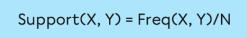 <br>
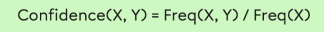 <br>
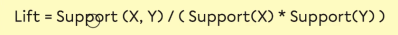

### Data Prep

**Dataset Story**: https://archive.ics.uci.edu/ml/datasets/Online+Retail+II <br>
The data set named Online Retail II includes the sales of a UK-based online sales store between 01/12/2009 and 09/12/2011.
Variables:

* InvoiceNo: Unique number for each transaction, i.e. invoice. If it starts with C, the transaction is cancelled.
* StockCode: Unique Product Code Number
* Description: Product Name
* Quantity: It indicates how many of the products on the invoices were sold.
* InvoiceDate: date and time
* UnitPrice: product price (Sterlin)
* CustomerID: unique number
* Country: Customer Residency

In [1]:
# !pip install mlxtend
import pandas as pd
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.width', 500)
pd.set_option('display.expand_frame_repr', False)
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
df_ = pd.read_excel("./datasets/online_retail_II.xlsx",
                    sheet_name="Year 2010-2011")

In [3]:
# !pip install openpyxl
# df_ = pd.read_excel("datasets/online_retail_II.xlsx",
#                     sheet_name="Year 2010-2011", engine="openpyxl")

In [12]:
df = df_.copy()
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,541910.0,9.552234,-80995.0,1.0,3.0,10.0,80995.0,218.080957
InvoiceDate,541910,2011-07-04 13:35:22.342307584,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-10-19 11:27:00,2011-12-09 12:50:00,NaN
Price,541910.0,4.611138,-11062.06,1.25,2.08,4.13,38970.0,96.759765
Customer ID,406830.0,15287.68416,12346.0,13953.0,15152.0,16791.0,18287.0,1713.603074


In [6]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64

In [7]:
df.shape

(541910, 8)

In [9]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    
    return low_limit, up_limit

In [10]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [13]:
def retail_data_prep(dataframe):
    dataframe.dropna(inplace=True)
    dataframe = dataframe[~dataframe["Invoice"].str.contains("C", na=False)]
    dataframe = dataframe[dataframe["Quantity"] > 0]
    dataframe = dataframe[dataframe["Price"] > 0]
    replace_with_thresholds(dataframe, "Quantity")
    replace_with_thresholds(dataframe, "Price")
    return dataframe

df = retail_data_prep(df)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8632\130684917.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-177.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit


In [14]:
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [15]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,397885.0,11.83077,1.0,2.0,6.0,12.0,298.5,25.523052
InvoiceDate,397885,2011-07-10 23:41:56.419316992,2010-12-01 08:26:00,2011-04-07 11:12:00,2011-07-31 14:39:00,2011-10-20 14:33:00,2011-12-09 12:50:00,NaN
Price,397885.0,2.893492,0.001,1.25,1.95,3.75,37.06,3.227175
Customer ID,397885.0,15294.416882,12346.0,13969.0,15159.0,16795.0,18287.0,1713.144421


In [16]:
df.shape

(397885, 8)

In [17]:
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2.0,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6.0,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6.0,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536368,22960,JAM MAKING SET WITH JARS,6.0,2010-12-01 08:34:00,4.25,13047.0,United Kingdom


### Preparing the ARL Data Structure (Invoice-Product Matrix)

In [18]:
# I started working on a country basis. For example, I want to enter the German market and France is a similar country in profile.
# Recommendation practices in Germany based on the association rule I learned from France I enter the market with.
df_fr = df[df['Country'] == "France"]

In [19]:
df_fr.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24.0,2010-12-01 08:45:00,3.75,12583.0,France
27,536370,22727,ALARM CLOCK BAKELIKE RED,24.0,2010-12-01 08:45:00,3.75,12583.0,France
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12.0,2010-12-01 08:45:00,3.75,12583.0,France
29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12.0,2010-12-01 08:45:00,0.85,12583.0,France
30,536370,21883,STARS GIFT TAPE,24.0,2010-12-01 08:45:00,0.65,12583.0,France


In [20]:
df_fr.groupby(['Invoice', 'Description']).agg({"Quantity": "sum"}).head(20)

Quantity
Invoice Description                                  
536370   SET 2 TEA TOWELS I LOVE LONDON          24.0
        ALARM CLOCK BAKELIKE GREEN               12.0
        ALARM CLOCK BAKELIKE PINK                24.0
        ALARM CLOCK BAKELIKE RED                 24.0
        CHARLOTTE BAG DOLLY GIRL DESIGN          20.0
        CIRCUS PARADE LUNCH BOX                  24.0
        INFLATABLE POLITICAL GLOBE               48.0
        LUNCH BOX I LOVE LONDON                  24.0
        MINI JIGSAW CIRCUS PARADE                24.0
        MINI JIGSAW SPACEBOY                     24.0
        MINI PAINT SET VINTAGE                   36.0
        PANDA AND BUNNIES STICKER SHEET          12.0
        POSTAGE                                   3.0
        RED TOADSTOOL LED NIGHT LIGHT            24.0
        ROUND SNACK BOXES SET OF4 WOODLAND       24.0
        SET/2 RED RETROSPOT TEA TOWELS           18.0
        SPACEBOY LUNCH BOX                       24.0
        STARS GIFT TAPE                          24.0
        VINTAGE HEADS AND TAILS CARD GAME        24.0
        VINTAGE SEASIDE JIGSAW PUZZLES           12.0

In [24]:
def create_invoice_product_df(dataframe, id=False):
    if id:
        return dataframe.groupby(['Invoice', "StockCode"])['Quantity'].sum().unstack().fillna(0).applymap(lambda x: 1 if x > 0 else 0)
    else:
        return dataframe.groupby(['Invoice', 'Description'])['Quantity'].sum().unstack().fillna(0).applymap(lambda x: 1 if x > 0 else 0)

In [25]:
fr_inv_pro_df = create_invoice_product_df(df_fr)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8632\3924142140.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return dataframe.groupby(['Invoice', 'Description'])['Quantity'].sum().unstack().fillna(0).applymap(lambda x: 1 if x > 0 else 0)


In [27]:
fr_inv_pro_df = create_invoice_product_df(df_fr, id=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8632\3924142140.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return dataframe.groupby(['Invoice', "StockCode"])['Quantity'].sum().unstack().fillna(0).applymap(lambda x: 1 if x > 0 else 0)


In [28]:
def check_id(dataframe, stock_code):
    product_name = dataframe[dataframe["StockCode"] == stock_code][["Description"]].values[0].tolist()
    print(product_name)

In [29]:
check_id(df_fr, 10120)

['DOGGY RUBBER']


### Extracting the Association Rules

In [30]:
# min_support=0.01 =>  support threshold value
frequent_itemsets = apriori(fr_inv_pro_df,
                            min_support=0.01,
                            use_colnames=True)

C:\Users\ASUS\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [31]:
frequent_itemsets.sort_values("support", ascending=False)

,support,itemsets
538,0.773779,(POST)
387,0.187661,(23084)
107,0.179949,(21731)
243,0.172237,(22554)
245,0.169666,(22556)
...,...,...
18793,0.010283,"(22729, 21086, 22326, 22551)"
18787,0.010283,"(23256, 21086, 22492, 22326)"
18786,0.010283,"(22728, 21086, 22492, 22326)"
18785,0.010283,"(21086, 22492, 22326, 22727)"


In [32]:
# extracting the association rule phase:
rules = association_rules(frequent_itemsets,
                          metric="support",
                          min_threshold=0.01)

In [34]:
# Leverage(like a lift) has a tendency to give priority to those with high support.
# But "lift" is a more valuable used metric.
# conviction => is the expected value/frequency of product x without product y.
rules[(rules["support"]>0.05) & (rules["confidence"]>0.1) & (rules["lift"]>5)]
# antecedents => first products; consequences => second products

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1606,(21080),(21086),0.133676,0.138817,0.102828,0.769231,5.541311,0.084271,3.731791,0.945994
1607,(21086),(21080),0.138817,0.133676,0.102828,0.740741,5.541311,0.084271,3.341535,0.951642
1608,(21080),(21094),0.133676,0.128535,0.102828,0.769231,5.984615,0.085646,3.776350,0.961424
1609,(21094),(21080),0.128535,0.133676,0.102828,0.800000,5.984615,0.085646,4.331620,0.955752
1776,(21086),(21094),0.138817,0.128535,0.123393,0.888889,6.915556,0.105550,7.843188,0.993284
...,...,...,...,...,...,...,...,...,...,...
213940,"(POST, 22727)","(22728, 22726)",0.089974,0.074550,0.059126,0.657143,8.814778,0.052418,2.699229,0.974208
213941,"(22726, 22727)","(22728, POST)",0.079692,0.092545,0.059126,0.741935,8.017025,0.051751,3.516388,0.951057
213942,(22728),"(POST, 22726, 22727)",0.102828,0.074550,0.059126,0.575000,7.712931,0.051460,2.177529,0.970101
213944,(22726),"(22728, POST, 22727)",0.097686,0.069409,0.059126,0.605263,8.720273,0.052346,2.357498,0.981172


In [35]:
check_id(df_fr, 21086)

['SET/6 RED SPOTTY PAPER CUPS']


In [36]:
# I should recommend those with high confidence for purchase.
rules[(rules["support"]>0.05) & (rules["confidence"]>0.1) & (rules["lift"]>5)].sort_values("confidence", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
23707,"(21080, 21094)",(21086),0.102828,0.138817,0.100257,0.975000,7.023611,0.085983,34.447301,0.955918
23706,"(21080, 21086)",(21094),0.102828,0.128535,0.100257,0.975000,7.585500,0.087040,34.858612,0.967673
108820,"(21080, POST, 21086)",(21094),0.084833,0.128535,0.082262,0.969697,7.544242,0.071358,28.758355,0.947858
108822,"(21080, POST, 21094)",(21086),0.084833,0.138817,0.082262,0.969697,6.985410,0.070486,28.419023,0.936271
1777,(21094),(21086),0.128535,0.138817,0.123393,0.960000,6.915556,0.105550,21.529563,0.981563
...,...,...,...,...,...,...,...,...,...,...
7212,(22629),(22630),0.125964,0.100257,0.071979,0.571429,5.699634,0.059351,2.099400,0.943382
62249,(22630),"(POST, 22629)",0.100257,0.100257,0.053985,0.538462,5.370809,0.043933,1.949443,0.904490
62244,"(POST, 22629)",(22630),0.100257,0.100257,0.053985,0.538462,5.370809,0.043933,1.949443,0.904490
62247,(22629),"(POST, 22630)",0.125964,0.074550,0.053985,0.428571,5.748768,0.044594,1.619537,0.945098


In [37]:
# def create_rules(dataframe, id=True, country="France"):
#     dataframe = dataframe[dataframe['Country'] == country]
#     dataframe = create_invoice_product_df(dataframe, id)
#     frequent_itemsets = apriori(dataframe, min_support=0.01, use_colnames=True)
#     rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.01)
#     return rules

### Making Product Recommendations to Users in the Cart Stage

In [38]:
# Example:
# User sample product id:22492

In [40]:
product_id = 22492
check_id(df, product_id)

['MINI PAINT SET VINTAGE ']


In [41]:
# After sorting, the first product in the consequents is recommended over the product received in the antecedents.
sorted_rules = rules.sort_values("lift", ascending=False)

In [42]:
recommendation_list = []
# I will go through the antecedents one by one and capture the productID received in the product/productSets here 
# and find where this product/product set is located. I will fetch the first one from the product set in the same index 
# as the index number in the consequents as a recommended product.
for i, product in enumerate(sorted_rules["antecedents"]):
    for j in list(product):
        if j == product_id:
            recommendation_list.append(list(sorted_rules.iloc[i]["consequents"])[0])

In [44]:
recommendation_list[0:3] 
# Products in recommendaiton_list from 0 index to increasing indexes
# It means that as you progress, there are products that are less likely to be recommended for purchase.

[22556, 22551, 22326]

In [45]:
check_id(df, 22326)
# In correspondinf of the product purchased 'MINI PAINT SET VINTAGE' => 'ROUND SNACK BOXES SET OF4 WOODLAND' is recommended.

['ROUND SNACK BOXES SET OF4 WOODLAND ']


In [46]:
# def arl_recommender(rules_df, product_id, rec_count=1):
#     sorted_rules = rules_df.sort_values("lift", ascending=False)
#     recommendation_list = []
#     for i, product in enumerate(sorted_rules["antecedents"]):
#         for j in list(product):
#             if j == product_id:
#                 recommendation_list.append(list(sorted_rules.iloc[i]["consequents"])[0])

#     return recommendation_list[0:rec_count]

# arl_recommender(rules, 22492, 1)
# arl_recommender(rules, 22492, 2)
# arl_recommender(rules, 22492, 3)